In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
values = []

slope = 0.2
exercise = 1.3

meteo = []

for i in range(150):
    value = (100-i)/(i+10) + i*slope
    if i%7==1: #mardi
        value += exercise
    elif i%7==4: #vendredi
        value += 1.4*exercise
        
    elif i%7==6: #dimanche
        value += 1.2*exercise
    
    else:
        value -= 0.2
        
        
    if np.random.random() > 0.3:
        meteo.append('sunny')
        value *= 1.1
    else:
        meteo.append('cloudy')
        value *= 0.9
        
    if value > 18:
        value = 18 
    values.append(value+np.random.random())

In [22]:
df = pd.DataFrame({'intensity':values, 'weather':meteo})
df.index = pd.date_range('2019-01-01', periods=len(values)).tz_localize('Europe/Paris')
df['timezone'] = '+01:00'

In [23]:
df.head()

,intensity,weather,timezone
2019-01-01 00:00:00+01:00,11.609940,sunny,+01:00
2019-01-02 00:00:00+01:00,9.841651,cloudy,+01:00
2019-01-03 00:00:00+01:00,8.382946,cloudy,+01:00
2019-01-04 00:00:00+01:00,8.052186,cloudy,+01:00
2019-01-05 00:00:00+01:00,10.459616,sunny,+01:00


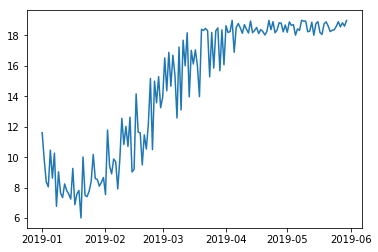

In [24]:
serie = pd.Series(values)
serie.index = pd.date_range('2019-01-01', periods=len(values))
plt.plot(serie)
plt.show()

In [39]:
FIGSIZE = (17, 8)
FONT = {'family': 'sans-serif', 'weight': 'normal', 'size': 16}

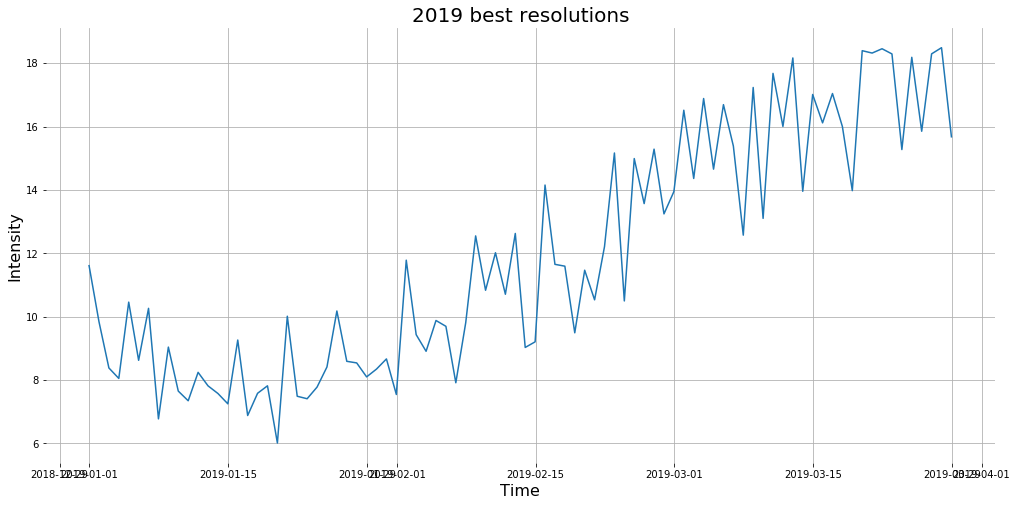

In [44]:
fig, ax = plt.subplots(figsize=FIGSIZE)


plt.title('2019 best resolutions', fontdict={'family': 'sans-serif', 'weight': 'normal', 'size': 20})
plt.xlabel('Time', fontdict=FONT)
plt.ylabel('Intensity', fontdict=FONT)

ax.set_frame_on(False)
plt.grid(True)
plt.plot(df[df.index<pd.to_datetime('2019-03-30').tz_localize('Europe/Paris')].intensity)
# plt.plot(df.intensity)

plt.show()

In [41]:
import craftai.pandas
import os

In [18]:
client = craftai.pandas.Client({
  "token": os.environ.get("UTC")
})

In [29]:
# CONFIGURATION is the same for all agents
CONFIGURATION = {
    "context": {
        "day_of_week": {                # feature generated by the API from the DataFrame index 
            "type" : "day_of_week"
        },
        "timezone": {                   # timezone for trip_counter      
            "type" : "timezone",        
        },
        "intensity": {               # taxi trips counter            
            "type": "continuous"
        },
        "weather": {
            "type": "enum"
        }
    },
    "output": ["intensity"],         # the output is continuous
    "learning_period": 31536000,         # 1 year: 365d * 24h * 3600s
    "tree_max_depth": 5 
}

In [30]:
agent_id = 'john'

# Delete older version of the agent
client.delete_agent(agent_id)

# Add the new agent
client.create_agent(CONFIGURATION, agent_id)


client.add_operations(agent_id, df)

{'message': 'Successfully added 150 operation(s) to the agent "yrieix.leprince/utc/john" context.'}